#Algoritmos Genéticos

Son llamados así porque se inspiran en la ***evolución biológica y su base genético-molecular***.




Los algoritmos genéticos son estrategias de resolución de problemas de optimización basados en la **teoría de la selección natural de Darwin**, mediante la cual aquellos ***individuos más aptos para sobrevivir tienen una mayor probabilidad de crear descendencia y transmitir su información genética.***

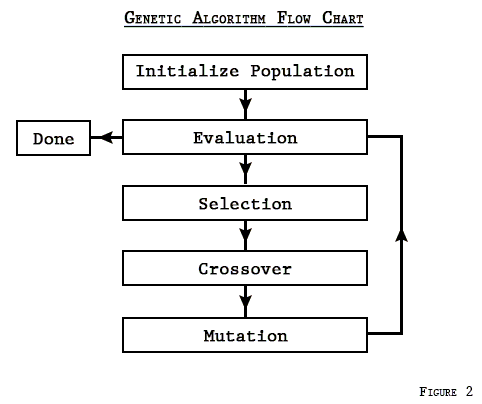

##1.Población


¿Qué es la población? La población es un **conjunto de genes**.

¿Qué es gen? es un **individuo** en la población


In [ ]:
gen = 'Hello World!'
Population = ('Hello World!', 'Hello Wordd!', 'Hello Morth!')

Entonces, ¿cómo crear o inicializar la población? simplemente cree una generación aleatoria y recójala, guárdela en una variable. Este es el código sobre cómo generar un nuevo gen aleatorio y recopilarlo en una población. El tipo de datos de la población es un dict, para matlab simplemente use struct. Antes de guardarlo en una población, debemos calcular la aptitud entre un gen y el objetivo. Si un gen coincide con el objetivo, el valor de aptitud es 100. Entonces, en la población tendremos un par de genes y su aptitud.




In [ ]:
# generate new gen
def create_gen(panjang_target):
    random_number = np.random.randint(32, 126, size=panjang_target)
    gen = ''.join([chr(i) for i in random_number])
    return gen

# calculate fitness of gen
def calculate_fitness(gen, target, panjang_target):
    fitness = 0
    for i in range (panjang_target):
        if gen[i:i+1] == target[i:i+1]:
            fitness += 1
    fitness = fitness / panjang_target * 100
    return fitness

# create population
def create_population(target, max_population, panjang_target):
    populasi = {}
    for i in range(max_population):
        gen = create_gen(panjang_target)
        genfitness = calculate_fitness(gen, target, panjang_target)
        populasi[gen] =  genfitness
    return populasi

##2.Población


> La selección es un proceso para elegir 2 mejores de una población.


How to choose it? just check the fitness of each gen and choose 2 biggest in a population

In [ ]:
# selection process
def selection(populasi):
    pop = dict(populasi)
    parent = {}
    for i in range(2):
        gen = max(pop, key=pop.get)
        genfitness = pop[gen]
        parent[gen] = genfitness
        if i == 0:
            del pop[gen]
    return parent

##3. Crossover


> El **"crossover"** consiste en realizar actividades sexuales entre dos padres elegidos en el proceso de selección.


En este código, el proceso crossover realiza un proceso como este:

In [ ]:
parent1 = 'abcde12345'
parent2 = '12345abcde'

offspring1 = 'abcdeabcde'
offspring2 = '1234512345'

la idea es obtener la última mitad total del carácter del padre1 y combinarla con la primera mitad total del carácter del padre2 y viceversa. El código completo de este proceso es así.

In [ ]:
# crossover
def crossover(parent, target, panjang_target):
    child = {}
    cp = round(len(list(parent)[0])/2)
    for i in range(2):
        gen = list(parent)[i][:cp] + list(parent)[1-i][cp:]
        genfitness = calculate_fitness(gen, target, panjang_target)
        child[gen] = genfitness
    return child

##4. Mutation



> El proceso de mutación es un operador genético utilizado para mantener la diversidad genética de una generación de una población de cromosomas de algoritmo genético a la siguiente.

La idea es que debemos elegir la tasa de mutación y hacer un bucle para que cada personaje de una generación obtenga un número aleatorio. Si el número aleatorio es mayor que la tasa de mutación, en ese bucle el carácter será reemplazado por un carácter aleatorio.



In [ ]:
# mutation
def mutation(child, target, mutation_rate, panjang_target):
    mutant = {}
    for i in range(len(child)):
        data = list(list(child)[i])
        for j in range(len(data)):
            if np.random.rand(1) <= mutation_rate:
                ch = chr(np.random.randint(32, 126))
                data[j] = ch
        gen = ''.join(data)
        genfitness = calculate_fitness(gen, target, panjang_target)
        mutant[gen] = genfitness
    return mutant

##5. Evaluation



> El proceso de evaluación es comprobar qué valor de aptitud

Si la idoneidad del proceso de mutación es igual al 100%, la suposición es la misma que la palabra objetivo y el proceso se detendrá.

In [ ]:
if bestfitness(mutant) >= 100:
        break

##6. Regeneration of Population



> La regeneración es insertar un gen de un proceso de mutación en una población.

En este proceso, el peor gen de una población se eliminará y se reemplazará con un nuevo gen procedente del proceso de mutación.

In [ ]:
# create new population with new best gen
def regeneration(mutant, populasi):
    for i in range(len(mutant)):
        bad_gen = min(populasi, key=populasi.get)
        del populasi[bad_gen]
    populasi.update(mutant)
    return populasi

In [ ]:
import numpy as np
import datetime

# generate new gen
def create_gen(panjang_target):
    random_number = np.random.randint(32, 126, size=panjang_target)
    gen = ''.join([chr(i) for i in random_number])
    return gen

# calculate fitness of gen
def calculate_fitness(gen, target, panjang_target):
    fitness = 0
    for i in range (panjang_target):
        if gen[i:i+1] == target[i:i+1]:
            fitness += 1
    fitness = fitness / panjang_target * 100
    return fitness

# create population
def create_population(target, max_population, panjang_target):
    populasi = {}
    for i in range(max_population):
        gen = create_gen(panjang_target)
        genfitness = calculate_fitness(gen, target, panjang_target)
        populasi[gen] =  genfitness
    return populasi

# selection process
def selection(populasi):
    pop = dict(populasi)
    parent = {}
    for i in range(2):
        gen = max(pop, key=pop.get)
        genfitness = pop[gen]
        parent[gen] = genfitness
        if i == 0:
            del pop[gen]
    return parent

# crossover
def crossover(parent, target, panjang_target):
    child = {}
    cp = round(len(list(parent)[0])/2)
    for i in range(2):
        gen = list(parent)[i][:cp] + list(parent)[1-i][cp:]
        genfitness = calculate_fitness(gen, target, panjang_target)
        child[gen] = genfitness
    return child

# mutation
def mutation(child, target, mutation_rate, panjang_target):
    mutant = {}
    for i in range(len(child)):
        data = list(list(child)[i])
        for j in range(len(data)):
            if np.random.rand(1) <= mutation_rate:
                ch = chr(np.random.randint(32, 126))
                data[j] = ch
        gen = ''.join(data)
        genfitness = calculate_fitness(gen, target, panjang_target)
        mutant[gen] = genfitness
    return mutant

# create new population with new best gen
def regeneration(mutant, populasi):
    for i in range(len(mutant)):
        bad_gen = min(populasi, key=populasi.get)
        del populasi[bad_gen]
    populasi.update(mutant)
    return populasi

# get best gen in a population
def bestgen(parent):
    gen = max(parent, key=parent.get)
    return gen

# get best fitness in a population
def bestfitness(parent):
    fitness = parent[max(parent, key=parent.get)]
    return fitness

# display function
def display(parent):
    timeDiff=datetime.datetime.now()-startTime
    print('{}\t{}%\t{}'.format(bestgen(parent), round(bestfitness(parent), 2), timeDiff))

# main program
target = 'Isabel Ruiz'
max_population = 12
mutation_rate = 0.1

print('Target Word :', target)
print('Max Population :', max_population)
print('Mutation Rate :', mutation_rate)

panjang_target = len(target)
startTime=datetime.datetime.now()
print('----------------------------------------------')
print('{}\t{}\t{}'.format('The Best','Fitness','Time'))
print('----------------------------------------------')
populasi = create_population(target, int(max_population), panjang_target)
parent = selection(populasi)

display(parent)
while 1:
    child = crossover(parent, target, panjang_target)
    mutant = mutation(child, target, float(mutation_rate), panjang_target)
    if bestfitness(parent) >= bestfitness(mutant):
        continue
    populasi = regeneration(mutant, populasi)
    parent = selection(populasi)
    display(parent)
    if bestfitness(mutant) >= 100:
        break

Target Word : Isabel Ruiz
Max Population : 12
Mutation Rate : 0.1
----------------------------------------------
The Best	Fitness	Time
----------------------------------------------
da]Be3g=Xep	9.09%	0:00:00.000945
da]Be3;4Wir	18.18%	0:00:00.001510
da]Be3;RWi-	27.27%	0:00:00.016830
da]be34RWi-	36.36%	0:00:00.027970
Ia]Be34Rui-	45.45%	0:00:00.068652
da]belJRui-	54.55%	0:00:00.192129
daabel4Rui-	63.64%	0:00:00.219627
d9abel Rui-	72.73%	0:00:00.257900
daabel Ruiz	81.82%	0:00:00.575537
I9abel Ruiz	90.91%	0:00:00.617175
Isabel Ruiz	100.0%	0:00:00.679056
